import library

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files


In [ ]:
files.download('/content/my_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

prepare dataset, rescale, split dataset ,...

In [ ]:
train_path = "/content/drive/MyDrive/data"

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split = 0.25
)
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (25, 25),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = ['0', '1', '2', '3','4', '5', '6', '7', '8', '9'],
    shuffle = True,
    subset='training',
    seed = 123
)

test_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (25, 25),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = ['0', '1', '2', '3','4', '5', '6', '7', '8', '9'],
    shuffle = True,
    subset='validation',
    seed = 123
)

Found 2913 images belonging to 10 classes.
Found 965 images belonging to 10 classes.


define 10 cái lớp sẽ detect

In [ ]:
def symbol(ind):
    symbols = ['α',
	       'β',
		   'γ',
		   'δ',
		   'λ',
		   'μ',
		   'Ω',
		   'π',
		   'φ',
			'θ']
    symb = symbols[ind.argmax()]
    return symb

plot ảnh thui kcg đâu :>


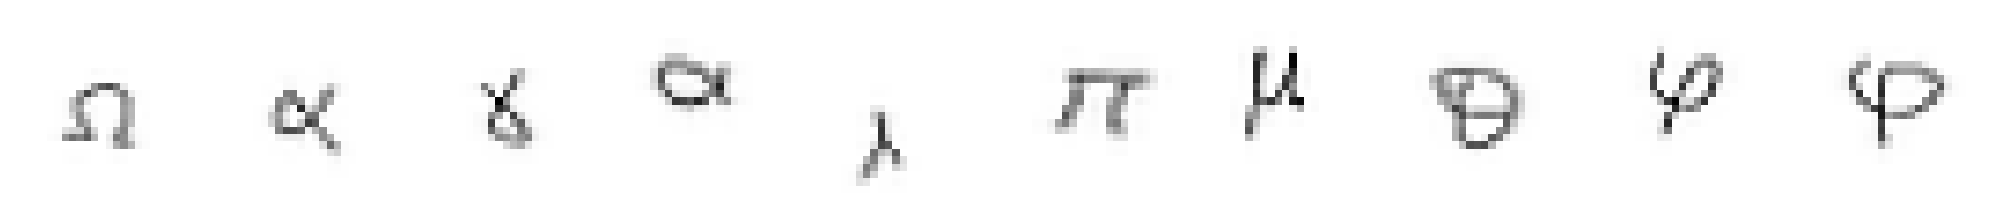

Ω
α
γ
α
λ
π
μ
θ
φ
φ


In [ ]:
imgs, labels = next(train_set)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
for i in range(10):
    print(symbol(labels[i]))

In [ ]:
# Now each image rows and columns are of 28x28 matrix type.
img_rows, img_columns = 25, 25

# Transform training and testing data to 10 classes in range [0,classes] ; num. of classes = 0 to 9 = 10 classes
total_classes = 10			# 0 to 9 labels


build model


In [ ]:
model = tf.keras.models.Sequential()

# First Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(img_rows, img_columns, 1)))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Second Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Classifier Head
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(total_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 5e-4)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

training

In [ ]:
b_size = 128		# Batch size
num_epoch = 20		# Number of epochs
verb = 1			# Verbose

In [ ]:
model.fit(train_set, validation_data = test_set, epochs = 20)

Epoch 1/20
92/92 [==============================] - 1162s 13s/step - loss: 2.2551 - accuracy: 0.1953 - val_loss: 2.1495 - val_accuracy: 0.2694
Epoch 2/20
92/92 [==============================] - 7s 71ms/step - loss: 1.7375 - accuracy: 0.3986 - val_loss: 1.7655 - val_accuracy: 0.3865
Epoch 3/20
92/92 [==============================] - 7s 75ms/step - loss: 1.2959 - accuracy: 0.5654 - val_loss: 1.4725 - val_accuracy: 0.4974
Epoch 4/20
92/92 [==============================] - 7s 73ms/step - loss: 0.9910 - accuracy: 0.6787 - val_loss: 1.2283 - val_accuracy: 0.5969
Epoch 5/20
92/92 [==============================] - 7s 74ms/step - loss: 0.7430 - accuracy: 0.7666 - val_loss: 1.0176 - val_accuracy: 0.6684
Epoch 6/20
92/92 [==============================] - 7s 74ms/step - loss: 0.5484 - accuracy: 0.8366 - val_loss: 0.8501 - val_accuracy: 0.7368
Epoch 7/20
92/92 [==============================] - 8s 83ms/step - loss: 0.4395 - accuracy: 0.8678 - val_loss: 0.6962 - val_accuracy: 0.7979
Epoch 8/20


In [67]:
model.save('my_model.h5')

In [68]:
new_model = tf.keras.models.load_model('/content/my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [ ]:
loss, acc = new_model.evaluate(test_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

31/31 - 3s - loss: 0.5312 - accuracy: 0.8528 - 3s/epoch - 96ms/step
Restored model, accuracy: 85.28%


predict


In [ ]:
def prediction(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv.resize(img,(25, 25))
    norm_image = cv.normalize(img, None, alpha = 0, beta = 1, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model.predict([case])

    return 'Prediction: ' + symbol(pred)

1/1 [==============================] - 0s 14ms/step


'Prediction: β'

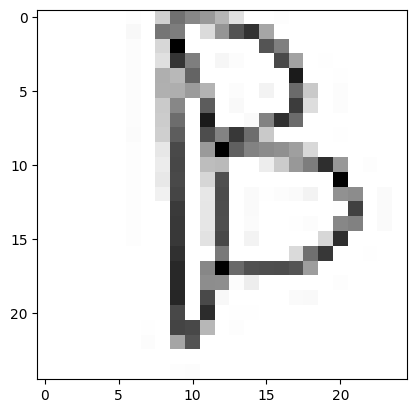

In [ ]:
prediction('/content/drive/MyDrive/data/1/1 (1).png')